In [4]:
# Cell 1: Imports 
import matplotlib.pyplot as plt 
import random 

# import from your local file from polygenerator 
from polygenerator import random_convex_polygon

# reproducibility 
random.seed(42)

In [5]:
# Cell 2: Generate a convex polygon 
num_points = 10 

# you can change this 
polygon = random_convex_polygon(num_points) 
polygon

[(0.6800990145221759, 1.0),
 (0.29380400225460934, 0.758504175284925),
 (0.0, 0.5597998278361158),
 (0.059756046890075916, 0.4291000963789615),
 (0.479971205511516, 0.024955061658013554),
 (0.6595306537983316, 0.0),
 (0.8880905144312682, 0.10450502338628041),
 (1.0, 0.3787061461275865),
 (0.9944803547515706, 0.7357941952992743),
 (0.9285859033266122, 0.9753399645437578)]

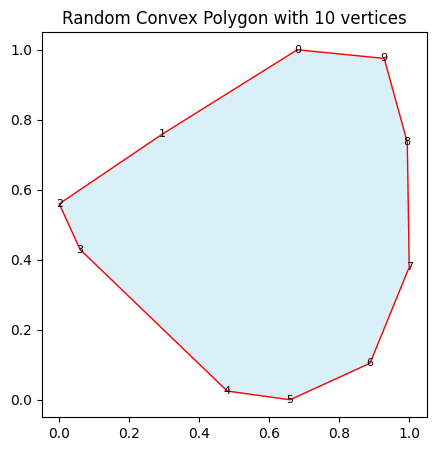

In [6]:
# Cell 3: Plot the convex polygon
plt.figure(figsize=(5,5))
plt.gca().set_aspect("equal")

# close polygon
poly_closed = polygon + [polygon[0]]

xs, ys = zip(*poly_closed)

plt.plot(xs, ys, "r-", linewidth=1)
plt.fill(xs, ys, alpha=0.3, color="skyblue")

# annotate vertices
for i, (x, y) in enumerate(polygon):
    plt.text(x, y, str(i), ha="center", va="center", fontsize=8)


plt.title(f"Random Convex Polygon with {num_points} vertices")
plt.show()

In [7]:
polygon


[(0.6800990145221759, 1.0),
 (0.29380400225460934, 0.758504175284925),
 (0.0, 0.5597998278361158),
 (0.059756046890075916, 0.4291000963789615),
 (0.479971205511516, 0.024955061658013554),
 (0.6595306537983316, 0.0),
 (0.8880905144312682, 0.10450502338628041),
 (1.0, 0.3787061461275865),
 (0.9944803547515706, 0.7357941952992743),
 (0.9285859033266122, 0.9753399645437578)]

In [9]:
import random
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from scipy.spatial.distance import cdist
import numpy as np

In [10]:
def generate_shortest_path(polygon, n_points=10, seed=None):
    """
    Generate n_points inside a polygon and connect them into the shortest path.
    
    Args:
        polygon (list of (x, y)): closed polygon vertices [(x1,y1), (x2,y2),...].
        n_points (int): number of points to sample inside.
        seed (int or None): random seed for reproducibility.
    
    Returns:
        points (list of (x,y)): sampled interior points.
        path (list of (x,y)): ordered path (shortest tour).
    """
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)

    # Ensure polygon is closed
    poly = Polygon(polygon)
    if not poly.is_valid:
        raise ValueError("Invalid polygon provided")

    # Sample points inside polygon
    minx, miny, maxx, maxy = poly.bounds
    points = []
    while len(points) < n_points:
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        if poly.contains(Point(x, y)):
            points.append((x, y))

    # Convert to numpy array
    pts = np.array(points)

    # Compute distance matrix
    dist_matrix = cdist(pts, pts)

    # --- Solve approximate TSP (nearest neighbor heuristic) ---
    unvisited = set(range(len(pts)))
    path_idx = [0]  # start from first point
    unvisited.remove(0)

    while unvisited:
        last = path_idx[-1]
        next_idx = min(unvisited, key=lambda j: dist_matrix[last, j])
        path_idx.append(next_idx)
        unvisited.remove(next_idx)

    path = pts[path_idx].tolist()

    return points, path

In [11]:
def generate_multiple_paths(polygon, n_paths=3, n_points=10, seed=None):
    """
    Generate multiple shortest paths inside a polygon and plot them.
    
    Args:
        polygon (list of (x, y)): closed polygon vertices [(x1,y1), (x2,y2),...].
        n_paths (int): number of paths to generate.
        n_points (int): number of points in each path.
        seed (int or None): random seed for reproducibility.
    
    Returns:
        paths (list of dict): List of dictionaries containing points and paths for each generated path.
    """
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)

    paths = []
    for i in range(n_paths):
        # Use a different seed for each path to ensure unique results
        path_seed = seed + i if seed is not None else None
        points, path = generate_shortest_path(polygon, n_points=n_points, seed=path_seed)
        paths.append({"points": points, "path": path})
    
    return paths

In [12]:
from polygenerator import random_convex_polygon

# Generate a random convex polygon
polygon = random_convex_polygon(12)  # convex polygon

# Generate multiple paths
n_paths = 3  # Number of paths to generate
n_points = 5  # Number of points in each path
seed = 42
paths = generate_multiple_paths(polygon, n_paths=n_paths, n_points=n_points, seed=seed)

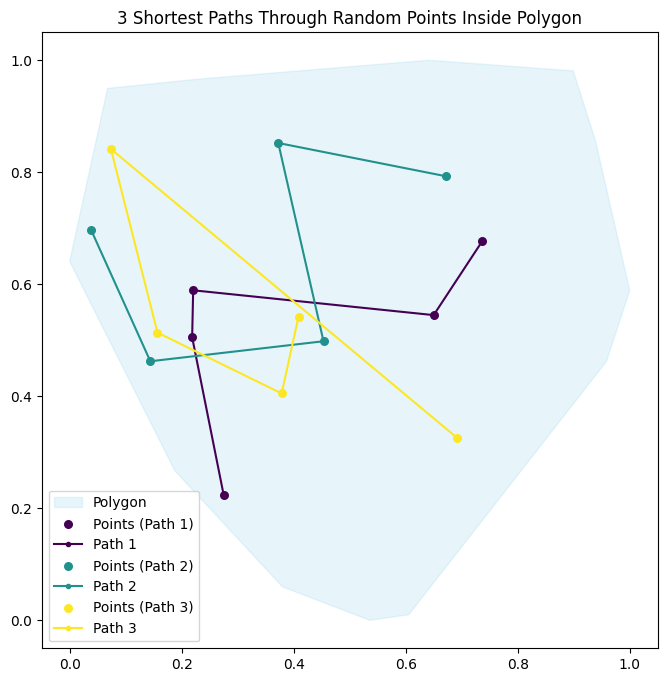

In [13]:
# Plot
plt.figure(figsize=(8, 8))
plt.gca().set_aspect("equal")

# Polygon
poly_closed = polygon + [polygon[0]]
xs, ys = zip(*poly_closed)
plt.fill(xs, ys, alpha=0.2, color="skyblue", label="Polygon")

# Plot each path
colors = plt.cm.viridis(np.linspace(0, 1, n_paths))  # Generate distinct colors for paths
for i, path_data in enumerate(paths):
    points = path_data["points"]
    path = path_data["path"]

    # Points
    px, py = zip(*points)
    plt.scatter(px, py, s=30, label=f"Points (Path {i+1})", color=colors[i])

    # Path
    path_x, path_y = zip(*path)
    plt.plot(path_x, path_y, ".-", label=f"Path {i+1}", color=colors[i])

plt.legend()
plt.title(f"{n_paths} Shortest Paths Through Random Points Inside Polygon")
plt.show()

In [14]:
import random
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from scipy.spatial.distance import cdist
import numpy as np
from matplotlib.patches import Rectangle

In [15]:
def generate_shortest_path(polygon, n_points=10, seed=None):
    """
    Generate n_points inside a polygon and connect them into the shortest path.
    
    Args:
        polygon (list of (x, y)): closed polygon vertices [(x1,y1), (x2,y2),...].
        n_points (int): number of points to sample inside.
        seed (int or None): random seed for reproducibility.
    
    Returns:
        points (list of (x,y)): sampled interior points.
        path (list of (x,y)): ordered path (shortest tour).
    """
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)

    # Ensure polygon is closed
    poly = Polygon(polygon)
    if not poly.is_valid:
        raise ValueError("Invalid polygon provided")

    # Sample points inside polygon
    minx, miny, maxx, maxy = poly.bounds
    points = []
    while len(points) < n_points:
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        if poly.contains(Point(x, y)):
            points.append((x, y))

    # Convert to numpy array
    pts = np.array(points)

    # Compute distance matrix
    dist_matrix = cdist(pts, pts)

    # --- Solve approximate TSP (nearest neighbor heuristic) ---
    unvisited = set(range(len(pts)))
    path_idx = [0]  # start from first point
    unvisited.remove(0)

    while unvisited:
        last = path_idx[-1]
        next_idx = min(unvisited, key=lambda j: dist_matrix[last, j])
        path_idx.append(next_idx)
        unvisited.remove(next_idx)

    path = pts[path_idx].tolist()

    return points, path

In [16]:
def generate_multiple_paths(polygon, n_paths=3, n_points=10, seed=None):
    """
    Generate multiple shortest paths inside a polygon and plot them.
    
    Args:
        polygon (list of (x, y)): closed polygon vertices [(x1,y1), (x2,y2),...].
        n_paths (int): number of paths to generate.
        n_points (int): number of points in each path.
        seed (int or None): random seed for reproducibility.
    
    Returns:
        paths (list of dict): List of dictionaries containing points and paths for each generated path.
    """
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)

    paths = []
    for i in range(n_paths):
        # Use a different seed for each path to ensure unique results
        path_seed = seed + i if seed is not None else None
        points, path = generate_shortest_path(polygon, n_points=n_points, seed=path_seed)
        paths.append({"points": points, "path": path})
    
    return paths

In [19]:
from polygenerator import random_convex_polygon

# Generate a random convex polygon
polygon = random_convex_polygon(12)  # convex polygon

# Generate multiple paths
n_paths = 3  # Number of paths to generate
n_points = 5  # Number of points in each path
seed = 42
paths = generate_multiple_paths(polygon, n_paths=n_paths, n_points=n_points, seed=seed)

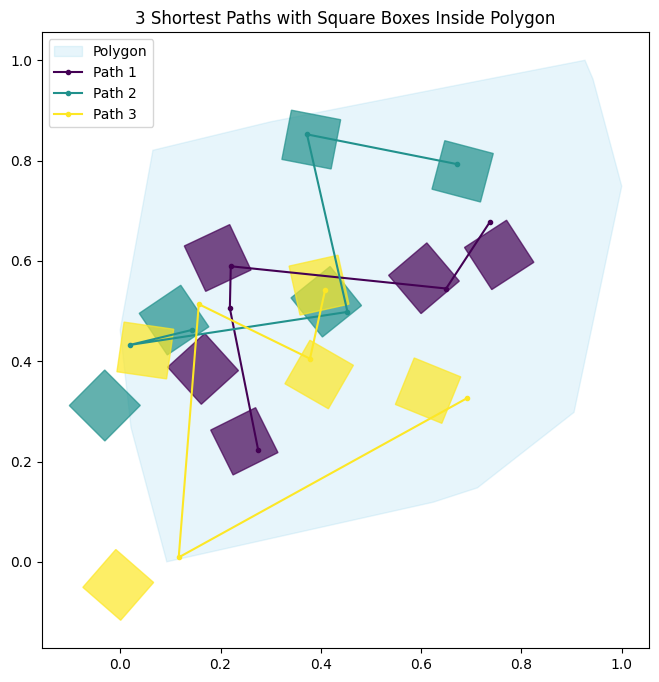

In [20]:
def plot_square(ax, center, size, angle, color):
    """
    Plot a square box at a given center with a specified size and rotation angle.
    
    Args:
        ax: Matplotlib axis object.
        center (tuple): (x, y) coordinates of the square's center.
        size (float): Length of the square's sides.
        angle (float): Rotation angle in degrees.
        color (str): Color of the square.
    """
    x, y = center
    square = Rectangle(
        (x - size / 2, y - size / 2),  # Bottom-left corner
        width=size,
        height=size,
        angle=angle,
        color=color,
        alpha=0.7,
    )
    ax.add_patch(square)


# Plot
plt.figure(figsize=(8, 8))
ax = plt.gca()
ax.set_aspect("equal")

# Polygon
poly_closed = polygon + [polygon[0]]
xs, ys = zip(*poly_closed)
plt.fill(xs, ys, alpha=0.2, color="skyblue", label="Polygon")

# Plot each path
colors = plt.cm.viridis(np.linspace(0, 1, n_paths))  # Generate distinct colors for paths
box_size = 0.1  # Size of the square boxes
for i, path_data in enumerate(paths):
    points = path_data["points"]
    path = path_data["path"]

    # Plot squares instead of points
    for point in points:
        random_angle = random.uniform(0, 360)  # Random orientation
        plot_square(ax, center=point, size=box_size, angle=random_angle, color=colors[i])

    # Path
    path_x, path_y = zip(*path)
    plt.plot(path_x, path_y, ".-", label=f"Path {i+1}", color=colors[i])

plt.legend()
plt.title(f"{n_paths} Shortest Paths with Square Boxes Inside Polygon")
plt.show()

In [21]:
import random
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from shapely.affinity import rotate
from shapely.geometry.polygon import Polygon as ShapelyPolygon
from shapely.geometry import box
from scipy.spatial.distance import cdist
import numpy as np
from matplotlib.patches import Rectangle, Circle, Wedge

In [22]:
def generate_shortest_path(polygon, n_points=10, seed=None):
    """
    Generate n_points inside a polygon and connect them into the shortest path.
    
    Args:
        polygon (list of (x, y)): closed polygon vertices [(x1,y1), (x2,y2),...].
        n_points (int): number of points to sample inside.
        seed (int or None): random seed for reproducibility.
    
    Returns:
        points (list of (x,y)): sampled interior points.
        path (list of (x,y)): ordered path (shortest tour).
    """
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)

    # Ensure polygon is closed
    poly = Polygon(polygon)
    if not poly.is_valid:
        raise ValueError("Invalid polygon provided")

    # Sample points inside polygon
    minx, miny, maxx, maxy = poly.bounds
    points = []
    while len(points) < n_points:
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        if poly.contains(Point(x, y)):
            points.append((x, y))

    # Convert to numpy array
    pts = np.array(points)

    # Compute distance matrix
    dist_matrix = cdist(pts, pts)

    # --- Solve approximate TSP (nearest neighbor heuristic) ---
    unvisited = set(range(len(pts)))
    path_idx = [0]  # start from first point
    unvisited.remove(0)

    while unvisited:
        last = path_idx[-1]
        next_idx = min(unvisited, key=lambda j: dist_matrix[last, j])
        path_idx.append(next_idx)
        unvisited.remove(next_idx)

    path = pts[path_idx].tolist()

    return points, path

In [23]:
def generate_square(center, size, angle):
    """
    Generate the coordinates of a square's corners given its center, size, and rotation angle.
    
    Args:
        center (tuple): (x, y) coordinates of the square's center.
        size (float): Length of the square's sides.
        angle (float): Rotation angle in degrees.
    
    Returns:
        square_coords (list of tuples): Coordinates of the square's four corners.
        square_polygon (ShapelyPolygon): Shapely polygon representing the square.
    """
    x, y = center
    half_size = size / 2

    # Create the square as a shapely box
    square = box(x - half_size, y - half_size, x + half_size, y + half_size)

    # Rotate the square around its center
    rotated_square = rotate(square, angle, origin=(x, y))

    # Extract the coordinates of the square's corners
    square_coords = list(rotated_square.exterior.coords)[:-1]  # Exclude the closing point
    return square_coords, rotated_square

In [24]:
def calculate_visibility(camera_location, max_range, obstacles):
    """
    Calculate the visible area of a camera given its location, range, and obstacles.
    
    Args:
        camera_location (tuple): (x, y) coordinates of the camera.
        max_range (float): Maximum viewing range of the camera (radius of the circle).
        obstacles (list of ShapelyPolygon): List of polygons representing obstacles.
    
    Returns:
        visible_area (ShapelyPolygon): The visible area of the camera after accounting for obstacles.
    """
    # Create the camera's viewing circle
    camera_circle = Point(camera_location).buffer(max_range)

    # Subtract obstacles from the viewing circle
    visible_area = camera_circle
    for obstacle in obstacles:
        visible_area = visible_area.difference(obstacle)

    return visible_area

In [26]:
from polygenerator import random_convex_polygon

# Generate a random convex polygon
polygon = random_convex_polygon(12)  # convex polygon

# Generate shortest paths
n_paths = 1  # Only one path is needed for the boxes
n_points = 5  # Number of points in each path
seed = 42
paths = generate_shortest_path(polygon, n_points=n_points, seed=seed)

# Generate square boxes
box_size = 0.5  # Size of the square boxes
squares = []
for point in paths[0]:  # Use the points from the first path
    random_angle = random.uniform(0, 360)  # Random orientation
    square_coords, square_polygon = generate_square(point, box_size, random_angle)
    squares.append(square_polygon)

# Generate camera locations
n_cameras = 3
camera_range = 3.0
camera_locations = [(random.uniform(0, 10), random.uniform(0, 10)) for _ in range(n_cameras)]

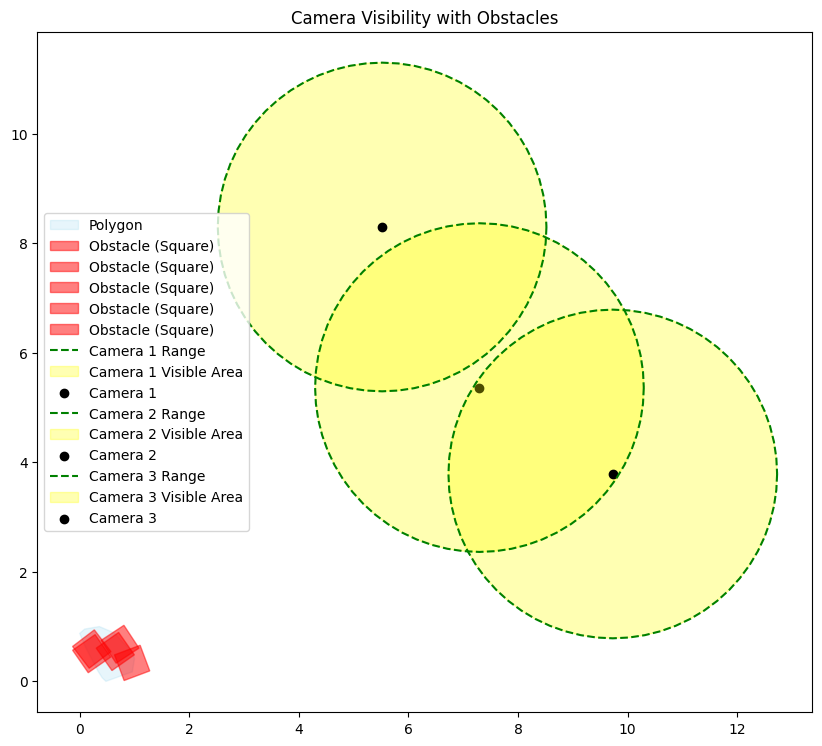

In [27]:
# Plot
plt.figure(figsize=(10, 10))
ax = plt.gca()
ax.set_aspect("equal")

# Polygon
poly_closed = polygon + [polygon[0]]
xs, ys = zip(*poly_closed)
plt.fill(xs, ys, alpha=0.2, color="skyblue", label="Polygon")

# Plot squares
for square in squares:
    x, y = square.exterior.xy
    plt.fill(x, y, color="red", alpha=0.5, label="Obstacle (Square)")

# Plot cameras and their visibility
for i, camera_location in enumerate(camera_locations):
    visible_area = calculate_visibility(camera_location, camera_range, squares)

    # Plot the camera's viewing range
    camera_circle = Point(camera_location).buffer(camera_range)
    x, y = camera_circle.exterior.xy
    plt.plot(x, y, color="green", linestyle="--", label=f"Camera {i+1} Range")

    # Plot the visible area
    if not visible_area.is_empty:
        x, y = visible_area.exterior.xy
        plt.fill(x, y, color="yellow", alpha=0.3, label=f"Camera {i+1} Visible Area")

    # Plot the camera location
    plt.scatter(*camera_location, color="black", label=f"Camera {i+1}")

plt.legend()
plt.title("Camera Visibility with Obstacles")
plt.show()

In [33]:
import random
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
from shapely.affinity import rotate
from shapely.geometry.polygon import Polygon as ShapelyPolygon
from shapely.geometry import box
from scipy.spatial.distance import cdist
import numpy as np
from matplotlib.patches import Rectangle

In [34]:
def generate_rays(camera_location, max_range, n_rays):
    """
    Generate rays extending outward from a camera's location.
    
    Args:
        camera_location (tuple): (x, y) coordinates of the camera.
        max_range (float): Maximum viewing range of the camera (length of the rays).
        n_rays (int): Number of rays to generate (360° divided into n_rays).
    
    Returns:
        rays (list of LineString): List of shapely LineString objects representing the rays.
    """
    x, y = camera_location
    angles = np.linspace(0, 360, n_rays, endpoint=False)  # Divide 360° into n_rays
    rays = []
    for angle in angles:
        # Compute the endpoint of the ray
        end_x = x + max_range * np.cos(np.radians(angle))
        end_y = y + max_range * np.sin(np.radians(angle))
        # Create a LineString from the camera to the endpoint
        ray = LineString([(x, y), (end_x, end_y)])
        rays.append(ray)
    return rays


def truncate_ray(ray, obstacles):
    """
    Truncate a ray at the first intersection with any obstacle.
    
    Args:
        ray (LineString): The original ray.
        obstacles (list of ShapelyPolygon): List of polygons representing obstacles.
    
    Returns:
        truncated_ray (LineString): The truncated ray, stopping at the first intersection.
    """
    for obstacle in obstacles:
        if ray.intersects(obstacle):
            intersection = ray.intersection(obstacle)
            if intersection.geom_type == "Point":
                # Truncate the ray at the intersection point
                return LineString([ray.coords[0], intersection.coords[0]])
            elif intersection.geom_type == "MultiPoint":
                # If there are multiple intersection points, take the closest one
                points = list(intersection)
                start = Point(ray.coords[0])
                closest_point = min(points, key=lambda p: start.distance(p))
                return LineString([ray.coords[0], closest_point.coords[0]])
    return ray  # Return the original ray if no intersection occurs

In [32]:
def generate_square(center, size, angle):
    """
    Generate the coordinates of a square's corners given its center, size, and rotation angle.
    
    Args:
        center (tuple): (x, y) coordinates of the square's center.
        size (float): Length of the square's sides.
        angle (float): Rotation angle in degrees.
    
    Returns:
        square_coords (list of tuples): Coordinates of the square's four corners.
        square_polygon (ShapelyPolygon): Shapely polygon representing the square.
    """
    x, y = center
    half_size = size / 2

    # Create the square as a shapely box
    square = box(x - half_size, y - half_size, x + half_size, y + half_size)

    # Rotate the square around its center
    rotated_square = rotate(square, angle, origin=(x, y))

    # Extract the coordinates of the square's corners
    square_coords = list(rotated_square.exterior.coords)[:-1]  # Exclude the closing point
    return rotated_square

In [46]:
def generate_cameras_inside_polygon(polygon, objects, n_cameras, seed=None):
    """
    Generate camera locations inside a polygon, avoiding obstacles.
    
    Args:
        polygon (list of (x, y)): Closed polygon vertices [(x1, y1), (x2, y2),...].
        objects (list of ShapelyPolygon): List of polygons representing obstacles.
        n_cameras (int): Number of cameras to generate.
        seed (int or None): Random seed for reproducibility.
    
    Returns:
        cameras (list of (x, y)): List of camera locations inside the polygon but not on obstacles.
    """
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)

    # Convert the polygon into a Shapely polygon
    poly = Polygon(polygon)
    
    # Ensure the polygon is valid
    if not poly.is_valid:
        raise ValueError("Invalid polygon provided")
    
    # Get the bounding box of the polygon
    minx, miny, maxx, maxy = poly.bounds
    
    cameras = []
    while len(cameras) < n_cameras:
        # Generate random points within the bounding box
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        point = Point(x, y)
        
        # Check if the point is inside the polygon and not on any obstacle
        if poly.contains(point) and not any(obj.contains(point) for obj in objects):
            cameras.append((x, y))
    
    return cameras

In [65]:
def generate_rays_from_cameras(polygon, objects, cameras, camera_range, n_rays=36):
    """
    Generate rays extending outward from each camera, colliding with objects and the polygon's edges.
    
    Args:
        polygon (list of (x, y)): Closed polygon vertices [(x1, y1), (x2, y2),...].
        objects (list of ShapelyPolygon): List of polygons representing obstacles.
        cameras (list of (x, y)): List of camera locations.
        camera_range (float): Maximum viewing range of the cameras (radius of the rays).
        n_rays (int): Number of rays to generate per camera (360° divided into n_rays).
    
    Returns:
        rays (list of list): A list of rays for each camera. Each ray is in the format:
            [(x1, y1), (x2, y2), true/false]
    """
    poly = Polygon(polygon)  # Convert the polygon into a Shapely polygon
    if not poly.is_valid:
        raise ValueError("Invalid polygon provided")
    
    rays = []  # To store all rays for all cameras
    
    for camera in cameras:
        camera_rays = []  # Rays for the current camera
        x, y = camera
        angles = np.linspace(0, 360, n_rays, endpoint=False)  # Generate ray angles
        
        for angle in angles:
            # Compute the endpoint of the ray if unobstructed
            end_x = x + camera_range * np.cos(np.radians(angle))
            end_y = y + camera_range * np.sin(np.radians(angle))
            ray = LineString([(x, y), (end_x, end_y)])
            
            # Find the closest intersection with objects
            closest_intersection = None
            hit_object = False
            for obj in objects:
                if ray.intersects(obj):
                    intersection = ray.intersection(obj)
                    if intersection.geom_type == "Point":
                        intersection_point = intersection
                    elif intersection.geom_type in ["MultiPoint", "GeometryCollection"]:
                        points = [p for p in intersection.geoms if p.geom_type == "Point"]
                        intersection_point = min(points, key=lambda p: Point(x, y).distance(p))
                    else:
                        continue
                    
                    # Update the closest intersection point
                    if closest_intersection is None or Point(x, y).distance(intersection_point) < Point(x, y).distance(closest_intersection):
                        closest_intersection = intersection_point
                        hit_object = True
            
            # Truncate the ray at the closest obstacle intersection
            if closest_intersection:
                ray = LineString([ray.coords[0], closest_intersection.coords[0]])
            
            # Check for intersections with the polygon boundary
            if not poly.contains(Point(ray.coords[-1])):
                boundary_intersection = ray.intersection(poly.boundary)
                if boundary_intersection.geom_type == "Point":
                    ray = LineString([ray.coords[0], boundary_intersection.coords[0]])
                elif boundary_intersection.geom_type == "MultiPoint":
                    # Take the closest boundary intersection point
                    points = list(boundary_intersection)
                    start = Point(ray.coords[0])
                    closest_boundary_point = min(points, key=lambda p: start.distance(p))
                    ray = LineString([ray.coords[0], closest_boundary_point.coords[0]])
            
            # Add the ray information
            camera_rays.append([(x, y), (ray.coords[-1][0], ray.coords[-1][1]), hit_object])
        
        rays.append(camera_rays)
    
    return rays

In [66]:
from polygenerator import random_convex_polygon

# Generate a random convex polygon
polygon = random_convex_polygon(12)  # convex polygon

# Generate shortest paths
n_paths = 2   # Number of objects of interest
n_points = 5  # Number of times steps
seed = 42
points, path = generate_shortest_path(polygon, n_points=n_points, seed=seed)

# Generate square boxes
box_size = 0.1  # Size of the objects (square boxes)
squares = []
for point in points:  # Use the points from the generated points
    random_angle = random.uniform(0, 360)  # Random orientation
    square_polygon = generate_square(point, box_size, random_angle)
    squares.append(square_polygon)

# Generate camera locations inside the polygon
n_cameras = 3
camera_range = 3.0
camera_locations = generate_cameras_inside_polygon(polygon, objects=squares, n_cameras=n_cameras, seed=42)

# Generate rays extruding outwards from each camera, colliding with the objects & polygon space at their edge.
rays = generate_rays_from_cameras(polygon, objects=squares, cameras=camera_locations, camera_range=camera_range)
# rays are tuples of start and end points, and a true/false depending on whether it hit an object or not. 





In [72]:
poly = Polygon(polygon)

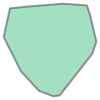

In [76]:
poly

In [77]:
squares

[<POLYGON ((0.247 0.158, 0.34 0.195, 0.303 0.288, 0.21 0.252, 0.247 0.158))>,
 <POLYGON ((0.788 0.629, 0.784 0.729, 0.684 0.725, 0.689 0.625, 0.788 0.629))>,
 <POLYGON ((0.189 0.441, 0.283 0.476, 0.248 0.569, 0.155 0.535, 0.189 0.441))>,
 <POLYGON ((0.587 0.514, 0.681 0.482, 0.713 0.576, 0.619 0.608, 0.587 0.514))>,
 <POLYGON ((0.236 0.658, 0.151 0.605, 0.205 0.52, 0.289 0.574, 0.236 0.658))>]

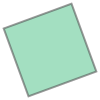

In [78]:
squares[2]

In [79]:
camera_locations

[(0.8058192518328079, 0.6981393949882269),
 (0.3402505165179919, 0.15547949981178155),
 (0.8474943663474598, 0.6037260313668911)]

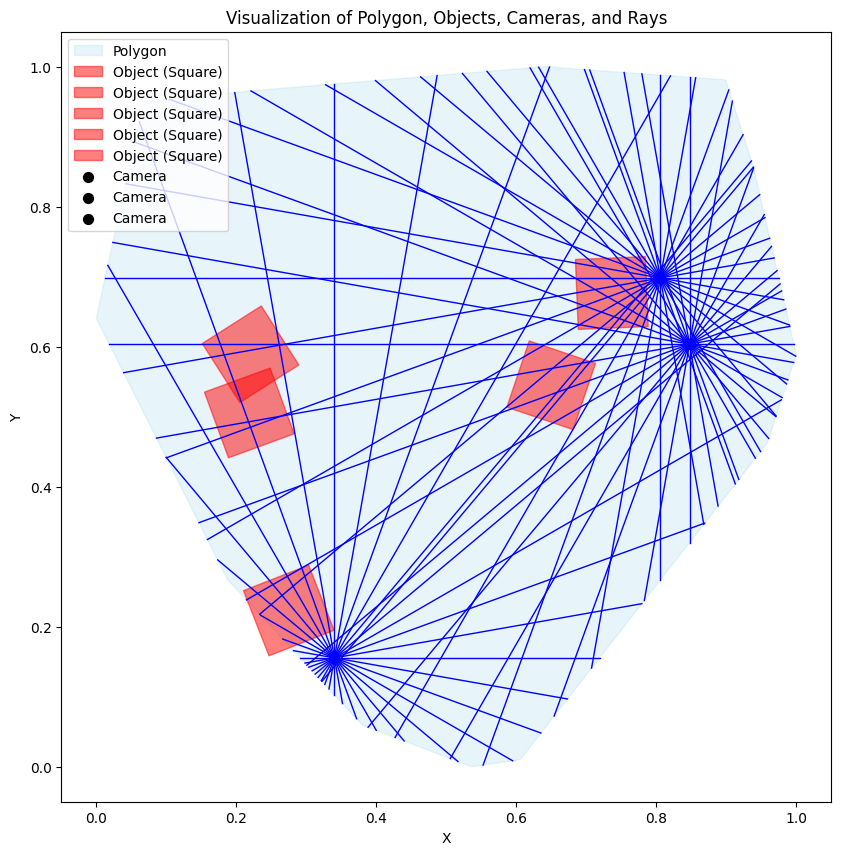

In [67]:

# Visualization Function
def visualize_polygon_with_rays(polygon, squares, cameras, rays):
    """
    Visualize the convex polygon, square objects, cameras, and rays.
    
    Args:
        polygon (list of (x, y)): Vertices of the convex polygon.
        squares (list of ShapelyPolygon): Square objects inside the polygon.
        cameras (list of (x, y)): Camera locations inside the polygon.
        rays (list of list): Rays generated from the cameras, with each ray in the format:
                             [(x1, y1), (x2, y2), true/false].
    """
    # Plot the polygon
    plt.figure(figsize=(10, 10))
    plt.gca().set_aspect("equal")
    poly_closed = polygon + [polygon[0]]  # Close the polygon by repeating the first vertex
    xs, ys = zip(*poly_closed)
    plt.fill(xs, ys, alpha=0.2, color="skyblue", label="Polygon")

    # Plot the square objects
    for square in squares:
        x, y = square.exterior.xy
        plt.fill(x, y, color="red", alpha=0.5, label="Object (Square)")

    # Plot the cameras
    for camera in cameras:
        plt.scatter(camera[0], camera[1], color="black", s=50, label="Camera")

    # Plot the rays
    for camera_rays in rays:
        for ray in camera_rays:
            start, end, hit_object = ray
            color = "green" if hit_object else "blue"
            plt.plot([start[0], end[0]], [start[1], end[1]], color=color, linewidth=1)

    # Add legend and title
    plt.legend(loc="upper left", fontsize=10)
    plt.title("Visualization of Polygon, Objects, Cameras, and Rays")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()


# Call the visualization function
visualize_polygon_with_rays(polygon, squares, camera_locations, rays)

# # Plot the results
# plt.figure(figsize=(10, 10))
# plt.gca().set_aspect("equal")

# # Plot the polygon
# poly_closed = polygon + [polygon[0]]
# xs, ys = zip(*poly_closed)
# plt.fill(xs, ys, alpha=0.2, color="skyblue", label="Polygon")

# # Plot obstacles
# for square in squares:
#     x, y = square.exterior.xy
#     plt.fill(x, y, color="red", alpha=0.5, label="Obstacle (Square)")

# # Plot cameras and their rays
# for i, camera_rays in enumerate(rays):
#     for ray in camera_rays:
#         start = ray[0]
#         end = ray[1]
#         color = "green" if ray[2] else "blue"
#         plt.plot([start[0], end[0]], [start[1], end[1]], color=color, linewidth=1)
#     plt.scatter(camera_locations[i][0], camera_locations[i][1], color="black", label=f"Camera {i+1}")

    
# plt.legend()
# plt.title("Camera Rays with Obstacles and Polygon Boundary")
# plt.show()

In [54]:
squares

[<POLYGON ((0.247 0.158, 0.34 0.195, 0.303 0.288, 0.21 0.252, 0.247 0.158))>,
 <POLYGON ((0.944 0.039, 0.94 0.139, 0.84 0.135, 0.844 0.035, 0.944 0.039))>,
 <POLYGON ((0.189 0.441, 0.283 0.476, 0.248 0.569, 0.155 0.535, 0.189 0.441))>,
 <POLYGON ((0.587 0.514, 0.681 0.482, 0.713 0.576, 0.619 0.608, 0.587 0.514))>,
 <POLYGON ((0.236 0.658, 0.151 0.605, 0.205 0.52, 0.289 0.574, 0.236 0.658))>]